In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.6806 - loss: 0.9875 - val_accuracy: 0.8292 - val_loss: 0.5204
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8232 - loss: 0.5054 - val_accuracy: 0.8356 - val_loss: 0.4826
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.8443 - loss: 0.4478 - val_accuracy: 0.8476 - val_loss: 0.4429
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.8502 - loss: 0.4245 - val_accuracy: 0.8530 - val_loss: 0.4346
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.8577 - loss: 0.4082 - val_accuracy: 0.8584 - val_loss: 0.4117
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.8667 - loss: 0.3815 - val_accuracy: 0.8692 - val_loss: 0.3727
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8686 - loss: 0.3693 - val_accuracy: 0.8700 - val_loss: 0.3679
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.8726 -

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

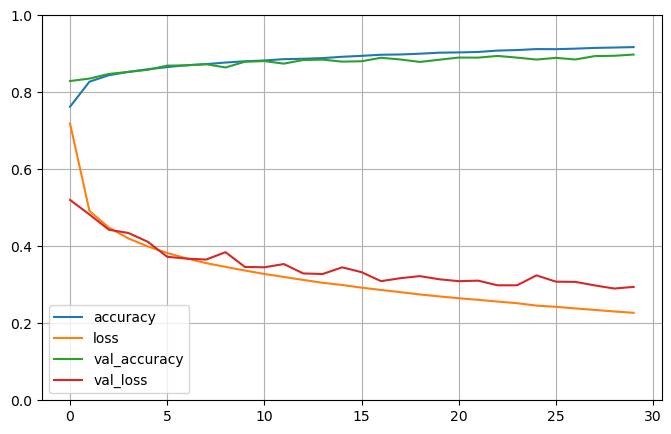

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8466 - loss: 64.8347


[67.35299682617188, 0.8453999757766724]

In [12]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
y_pred=np.argmax(y_proba,axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')